# Linear Regression using R-Squared Error and Gradient Descent

In [1]:
# importing dependencies
from statistics import mean
import pandas as pd   #to load data and modify it
import numpy as np    # for numerical calculations
import matplotlib.pyplot as plt
%matplotlib inline

 # Fit a line to Input Data
Also, we studied that to find out the "Best Fit Line" we require the values of m and b. So, to find the best fit line, we used the formula:

Slope(m) = (mean(x)mean(y) - mean(xy)) / (mean(x)^2 - mean(x^2))
Bias(b) = mean(y) - m*mean(x)
and then put these values in the equation of a straight line to get the new values for y

In [2]:
# Equation for a Straight Line:  y = mx + b
# Function to predict the Best Fit Slope
# Slope(m) = (mean(x)*mean(y) - mean(x*y))/(mean(x)^2 - mean(x^2))
# Bias(b) = mean(y) - m*mean(x)

def best_fit_slope(X,y):
    slope_m = ((mean(X)*mean(y)) - mean(X*y))/(mean(X)**2 - mean(X**2))
    bias_b = mean(y) - slope_m*mean(X)
    return slope_m, bias_b

# Load Dataset

In [4]:
# Load the data using Pandas

df = pd.read_csv('Insurane_dataset.csv')

In [5]:
# Let's have a look at the data, what it looks like, how many data points are there in the data.

print(df.head())

     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


Data is in the form of two columns, X and Y. X is the total number of claims and Y represents the claims in thousands of Swedish Kronor(price).

In [6]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


# Scatter Plot of Input Data

In [9]:
# Load the data in the form to be input to the function for Best Fit Line

X = np.array(df['X'], dtype=np.float64)
y = np.array(df['Y'], dtype=np.float64)

Text(0.5,1,'Input Data Scatter Plot')

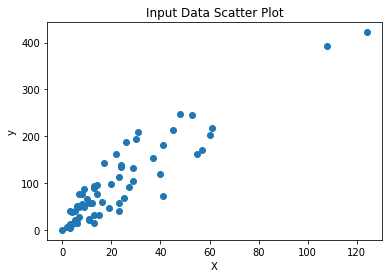

In [29]:
# Scatter Plot of the Input Data

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Input Data Scatter Plot')

In [10]:
#Now, lets use the function we defined above and find the values for m and b to get the line that best fits the data.

m,b = best_fit_slope(X,y)

print('Slope: ',m)
print('Bias: ',b)

Slope:  3.4138235600663664
Bias:  19.99448575911481


Calculate Values of y_hat

In [11]:
# Calculate y_hat

y_hat = m*X + b

print('y_hat: ', y_hat)

y_hat:  [388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.995369   122.40919256 101.9262512   50.7188978  125.82301612
  67.7880156  200.92713444 108.75389832]


Text(0.5,1,'Line fit to Input Data')

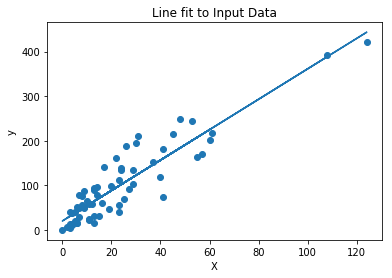

In [12]:
# Scatter Plot of the Input Data with the line fit on Input Data

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.plot(X,y_hat)
ax.set_title('Line fit to Input Data')

# Find the Squared Error and R-Squared Error

# Squared Error = sum((y_hat - y)^2)

In [13]:
def squared_Error(y, y_hat):
    return sum((y_hat - y)**2)

 # R-Squared Error = 1 - ((Squared_Error(y_hat)) / (Squared_Error(mean(y)))

In [14]:
def r_squared(y,y_hat):
    # Mean of all data points forms the mean line
    mean_line = mean(y)
    
    # Squared Error between Regression Line (y_hat) and the data points
    y_hat_Squared_Error = squared_Error(y,y_hat)
    
    # Squared Error between Mean Line and data points
    y_Squared_Error = squared_Error(y,mean_line)
    
    return 1 - (y_hat_Squared_Error/y_Squared_Error)

In [15]:
print('R-Squared Error: ', r_squared(y,y_hat))

R-Squared Error:  0.8333466719794502


In [16]:
# Accuracy%

print('Accuracy% : ', r_squared(y,y_hat))

Accuracy% :  0.8333466719794502


In [17]:
# Testing the Best Fit Line for Linear Regression

new_X = 85
new_y = (m*new_X + b)
print('y: ',new_y)

y:  310.169488364756


Text(0.5,1,'Testing Line for New Data')

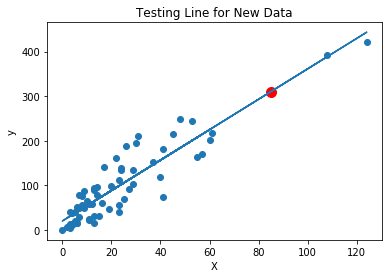

In [18]:
# Let's now plot this point and check for accuracy
# Scatter Plot of the values "new_X" and "new_y"

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(new_X,new_y,c='r',s=100)
ax.plot(X,y_hat)
ax.set_title('Testing Line for New Data')